In [6]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import time
from LandMPC.MPCLandControl import MPCLandControl
from src.rocket import Rocket, perturb_rocket
from src.pos_rocket_vis import *

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]
K: [[-9.82670419 -6.76919539]]
Maximum invariant set successfully computed after 31 iterations for Z MPC.
X_tilde vertices:
[[ 0.  1.]
 [ 0. 19.]]
U_tilde vertices:
[[46.25475859]
 [61.2357243 ]]
U_tilde has 2 constraints
Maximum invariant set successfully computed after 32 iterations for Z MPC.
Terminal set Xf_tilde computed with 34 constraints


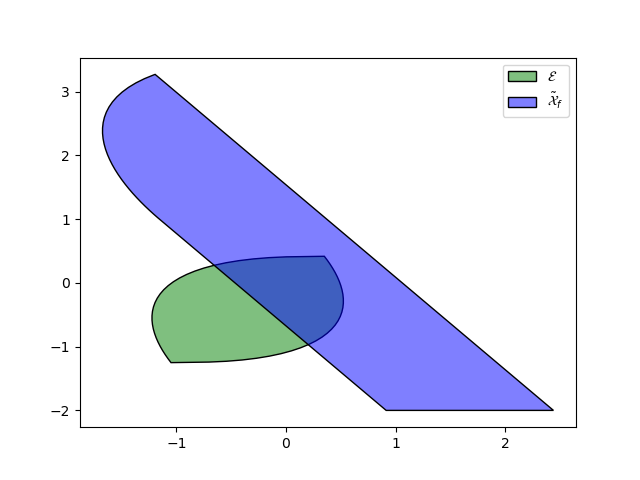

In [8]:
sim_time = 10 # simulation length in seconds

x0 = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(30), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               0, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               3, #x [m]
               2, #y [m]
               10  #z [m]
               ])  # initial state   
x_ref = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(0), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               0, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               1, #x [m]
               0, #y [m]
               3  #z [m]
               ])

xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)
A, B = rocket.linearize(xs, us)

# MPC parameters
H = 5
# Merge four linear mpc
mpc = MPCLandControl().new_controller(rocket, Ts, H, x_ref=x_ref)

Simulating time 0.00

 State alpha violation: 0.21 > 0.17, 
 State alpha violation: 0.23 > 0.17, 
 State alpha violation: 0.23 > 0.17, 
 State alpha violation: 0.23 > 0.17, 
 State beta violation: -0.19 < -0.17, 
 State alpha violation: 0.22 > 0.17, 
 State beta violation: -0.20 < -0.17, 
 State alpha violation: 0.20 > 0.17, 
 State beta violation: -0.21 < -0.17, 
 State alpha violation: 0.19 > 0.17, 
 State beta violation: -0.20 < -0.17, 
 State beta violation: -0.20 < -0.17, 
 State beta violation: -0.19 < -0.17, 
 State beta violation: -0.19 < -0.17, 
 State beta violation: -0.18 < -0.17, Simulating time 1.00
Simulating time 2.00
Simulating time 3.00
Simulating time 4.00
Simulating time 5.00
Simulating time 6.00
Simulating time 7.00
Simulating time 8.00
Simulating time 9.00


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

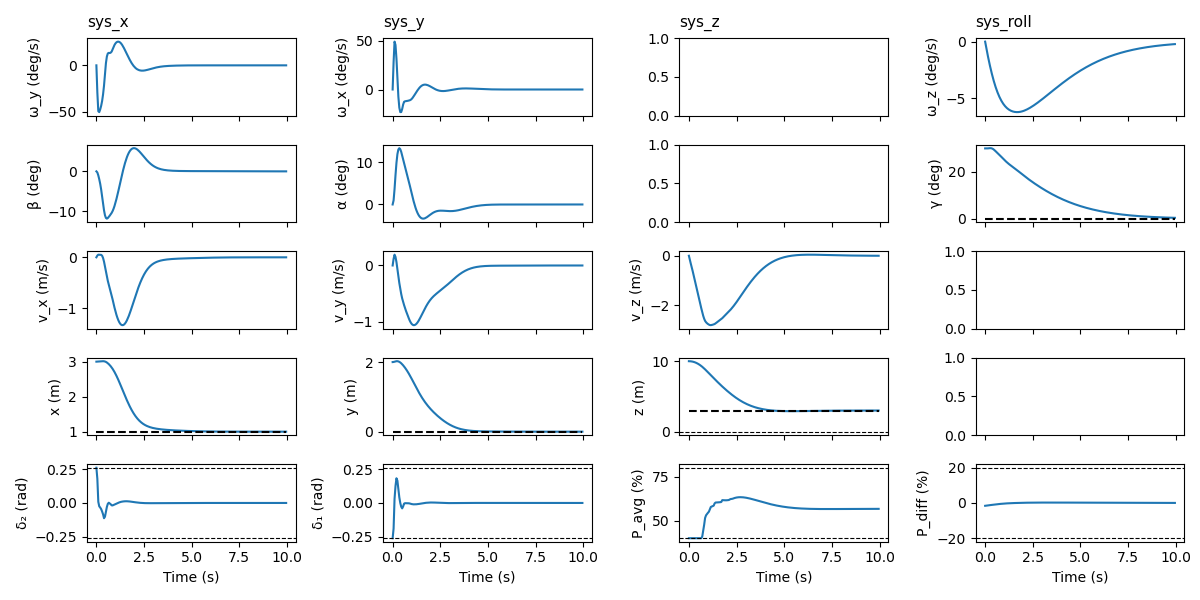

In [9]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(mpc, sim_time, H, x0)
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)